In [90]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [91]:
service_requests = pd.read_csv('data/311_Service_Requests_from_2010_to_Present.csv')

In [92]:
list(service_requests)

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'BBL',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Open Data Channel Type',
 'Park Facility Name',
 'Park Borough',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Latitude',
 'Longitude',
 'Location']

In [93]:
print(len(service_requests))
service_requests = service_requests.dropna(subset=['Resolution Description'])
service_requests = service_requests.dropna(subset=['Longitude', 'Latitude'])
print(len(service_requests))

16629
16231


In [94]:
service_requests.groupby('Resolution Description').count().sort_values(by='BBL', ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
Resolution Description,,,,,,,,,,,,,,,,,,,,,
The Department of Buildings investigated this complaint and determined that no further action was necessary.,5214,5214,5214,5214,5214,5214,5214,0,5214,5214,...,0,0,0,0,0,0,0,5214,5214,5214
The Department of Buildings investigated this complaint and issued an Office of Administrative Trials and Hearings (OATH) summons.,4695,4695,4695,4695,4695,4695,4695,0,4695,4695,...,0,0,0,0,0,0,0,4695,4695,4695
"The Department of Buildings attempted to investigate this complaint twice but could not gain access to the location. If the problem still exists, please call 311 and file a new complaint with additional access information. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).",3793,3793,3793,3793,3793,3793,3793,0,3793,3793,...,0,0,0,0,0,0,0,3793,3793,3793
"The Department of Buildings reviewed this complaint and closed it. If the problem still exists, please call 311 and file a new complaint. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).",870,870,870,870,870,870,870,0,870,870,...,0,0,0,0,0,0,0,870,870,870
"The Department of Buildings determined that the conditions described in this complaint were addressed under another service request number. Click on ""Learn More"" in the ""Did You Know"" section below for more information.",739,739,739,739,739,739,739,0,739,739,...,0,0,0,0,0,0,0,739,739,739
The Department of Buildings investigated this complaint and issued a violation.,287,287,287,287,287,287,287,0,287,287,...,0,0,0,0,0,0,0,287,287,287
Your Service Request has been submitted to the Department of Buildings. Please check back later for status.,260,260,260,260,260,260,260,0,260,260,...,0,0,0,0,0,0,0,260,260,260
The Department of Buildings reviewed this complaint and determined that no further action was necessary.,91,91,91,91,91,91,91,0,91,91,...,0,0,0,0,0,0,0,91,91,91
The Department of Buildings reviewed this complaint and referred it to the Department of Housing Preservation and Development for further action.,75,75,75,75,75,75,75,0,75,75,...,0,0,0,0,0,0,0,75,75,75


# Let's look at these suckers over time

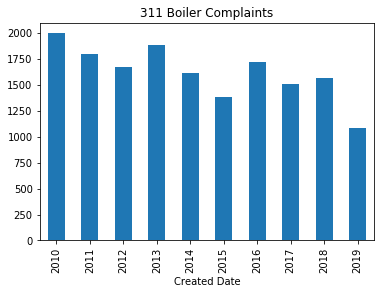

In [95]:
service_requests['Created Date'] = service_requests['Created Date'].astype("datetime64")
service_requests['Closed Date'] = service_requests['Closed Date'].astype("datetime64")

service_requests['Time Diff'] = (service_requests['Closed Date'] - service_requests['Created Date'])

service_requests.groupby(service_requests["Created Date"].dt.year).count()['Unique Key'].plot(kind="bar", title='311 Boiler Complaints')

# Question: What percentage of complaints result in further action?
Which complaints resulted in an OATH violation?

In [96]:
positive_request = service_requests[service_requests['Resolution Description'].str.contains('OATH')]

In [97]:
print(len(positive_request) / len(service_requests))

0.2917257100609944


# Answer: ~30% of 311 complaints result in further action.

# Question: How have these complaints changed over time?

In [98]:
all_requests_count = service_requests.groupby(service_requests["Created Date"].dt.year).count()['Unique Key']
positive_requests_count = positive_request.groupby(positive_request["Created Date"].dt.year).count()['Unique Key']

In [99]:
all_requests_count.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='Created Date')

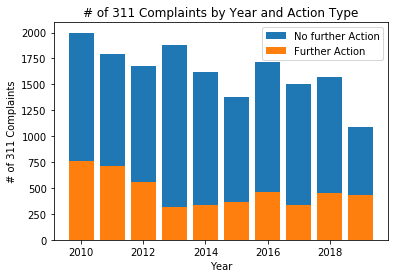

In [100]:
plt.bar(all_requests_count.index, all_requests_count.values)
plt.bar(positive_requests_count.index, positive_requests_count.values)
plt.xlabel('Year')
plt.ylabel('# of 311 Complaints')
plt.title("# of 311 Complaints by Year and Action Type")
plt.legend(['No further Action', 'Further Action'])

# Question: Where are these complaints occuring?

In [101]:
import folium
from folium import plugins

m = folium.Map([40.71, -74], zoom_start=11)

complaint_locations = service_requests[['Latitude', 'Longitude']].values

m.add_child(plugins.HeatMap(complaint_locations, radius=15))
m

# Question: What is the average time it takes to open and close one of these complaints?

0.2548210215020639% of all boiler complaints get closed within 7.0 days


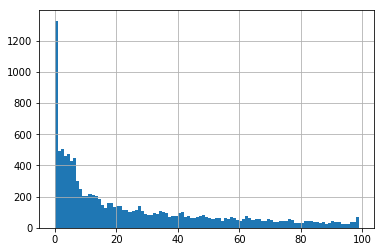

In [102]:
date_interval = 7.0
closure_time_interval = len(service_requests[service_requests['Time Diff'].astype('timedelta64[D]') < date_interval]) / len(service_requests)
print("{}% of all boiler complaints get closed within {} days".format(closure_time_interval, date_interval))

# print("Median open to close time diff: {}".format(all_time_diff.median()))
service_requests['Time Diff'].astype('timedelta64[D]').hist(bins=range(0,100,1))

### Positive Request open to closed time idff

In [114]:
closure_time_interval = len(positive_request[positive_request['Time Diff'].astype('timedelta64[D]') < date_interval]) / len(positive_request)
print("{}% of positive boiler complaints get closed within {} days".format(closure_time_interval, date_interval))

0.3457233368532207% of positive boiler complaints get closed within 7.0 days


### Negative Request open to closed time diff

In [111]:
negative_requests = service_requests[~service_requests['Resolution Description'].str.contains('OATH')]
print(len(negative_requests))

11496


In [115]:
closure_time_interval = len(negative_requests[negative_requests['Time Diff'] < date_interval]) / len(negative_requests)
print("{}% of negative boiler complaints get closed within {} days".format(closure_time_interval, date_interval))

0.21737995824634657% of negative boiler complaints get closed within 7.0 days


I feel like this kind of suggests that the boiler unit has a decent understanding of which complaints should be responded to first.  Then again, my interpitation of open and closed date could be totally off... just something to think about tho

# Questions: What features of a complaint affect the open to close time diff?

In [107]:
service_requests['Time Diff'] = all_time_diff.astype('timedelta64[D]')
len(service_requests[service_requests['Time Diff'] <= 7.0]) / len(service_requests)

0.2733041710307436

In [108]:
ds = service_requests.drop(['Park Facility Name', 'Park Borough', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status'], axis=1)
list(ds)

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'BBL',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Open Data Channel Type',
 'Latitude',
 'Longitude',
 'Location',
 'Time Diff']

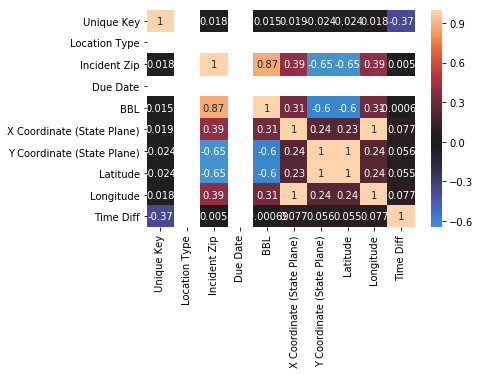

In [109]:
import seaborn as sns

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           center = 0,
           annot=True)